### aim: 

### date: 

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [3]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [4]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 13})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 13}
plt.rcParams['text.usetex'] = True
plt.rc('font', **font)

In [51]:
import xarray as xr

w = xr.open_dataset('/gpfs/afm/greenocean/software/runs/TOM12_TJ_CEC4/ORCA2_1m_20220101_20221231_ptrc_T.nc')
q = w.D14B.values
print(np.nanmax(q))
print(np.nanmin(q))

nan
nan


## MASKS

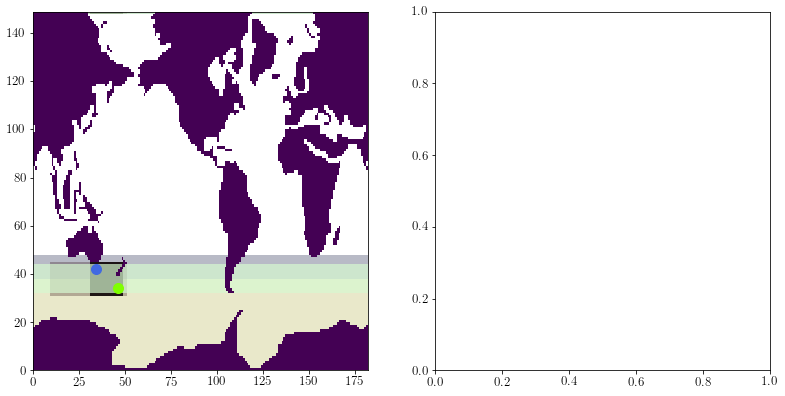

In [5]:
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS/')
import utils as ut
reload(ut)

# tY_tas ,tX_tas = ut.find_closest(179.5292,-41.8961)
# tY_tas ,tX_tas = ut.find_closest(95,-41.8961)

tY_tas ,tX_tas = ut.find_closest(145.5292,-41.8961)
tY_ci ,tX_ci = ut.find_closest(169.17,-52.59)

tmesh = xr.open_dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')
tmesh['landmask'] = tmesh.tmask[0,0,:,:]# * tmesh.e1t[0,:,:] * tmesh.e2t[0,:,:]
mask = tmesh.landmask.values.astype(float)
mask_land = np.copy(mask)
mask_land[mask_land == 1] = np.nan

mask_so = np.copy(mask)
mask_so[48:148,:] = np.nan
mask_so[mask_so == 0] = np.nan
mask_so1 = np.copy(mask_so)
mask_so1[np.isnan(mask_so1)] = 0
var_copy = tmesh['landmask'].copy()
var_copy.name = 'mask_so'
var_copy.data = mask_so1
tmesh['mask_so'] =var_copy

mask_so50 = np.copy(mask)
mask_so50[38:158,:] = np.nan
mask_so50[mask_so50 == 0] = np.nan
mask_so501 = np.copy(mask_so50)
mask_so501[np.isnan(mask_so501)] = 0
var_copy = tmesh['landmask'].copy()
var_copy.name = 'mask_so50'
var_copy.data = mask_so501
tmesh['mask_so50'] =var_copy

mask_smol = np.copy(mask)
ofs = 3
mask_smol[0:tY_ci-ofs,:] = np.nan
mask_smol[tY_tas+ofs:148,:] = np.nan
mask_smol[:,0:tX_tas-ofs] = np.nan
mask_smol[:,tX_ci+ofs:190] = np.nan
mask_smol[mask_smol == 0] = np.nan
mask_smol1 = np.copy(mask_smol)
mask_smol1[np.isnan(mask_smol1)] = 0
var_copy = tmesh['landmask'].copy()
var_copy.name = 'mask_smol'
var_copy.data = mask_smol1
tmesh['mask_smol'] =var_copy

mask_wide = np.copy(mask)
ofs = 3
mask_wide[0:tY_ci-ofs,:] = np.nan
mask_wide[tY_tas+ofs:148,:] = np.nan
mask_wide[:,0:9] = np.nan
mask_wide[:,51:190] = np.nan
mask_wide[mask_wide == 0] = np.nan
mask_wide1 = np.copy(mask_wide)
mask_wide1[np.isnan(mask_wide1)] = 0
var_copy = tmesh['landmask'].copy()
var_copy.name = 'mask_wide'
var_copy.data = mask_wide1
tmesh['mask_wide'] =var_copy

mask_band = np.copy(mask)
ofs = 2
mask_band[0:tY_ci-ofs,:] = np.nan
mask_band[tY_tas+ofs:148,:] = np.nan
mask_band[mask_band == 0] = np.nan
mask_band1 = np.copy(mask_band)
mask_band1[np.isnan(mask_band1)] = 0
var_copy = tmesh['landmask'].copy()
var_copy.name = 'mask_band'
var_copy.data = mask_band1
tmesh['mask_band'] =var_copy

fact = 1.1
fig, axs = plt.subplots(1,2, figsize=(12*fact, 6*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

tcmap = plt.get_cmap("Spectral")
axs[0].pcolormesh(mask_so, cmap = cm.curl, alpha = 0.3 )
axs[0].pcolormesh(mask_so50, cmap = cm.speed, alpha = 0.7 )
axs[0].pcolormesh(mask_smol, cmap = cm.gray, alpha = 0.9 )
axs[0].pcolormesh(mask_wide, cmap = cm.solar, alpha = 0.3 )
axs[0].pcolormesh(mask_band, cmap = cm.algae, alpha = 0.7 )
axs[0].pcolormesh(mask_land, cmap = 'viridis', alpha = 1 )
axs[0].plot(tX_tas, tY_tas, color = 'royalblue', marker = 'o', markersize = 10, label = 'tasmania')
axs[0].plot(tX_ci, tY_ci, color = 'chartreuse', marker = 'o', markersize = 10, label = 'campbell is.')

#tmesh.to_netcdf('./obs/mmask.nc')

In [6]:
prod = {
    'UKESM': {
        'col': 'k', 'linestyle': ':', 'fnam': 'UKESM1',},
    'NCEP-NCAR': {
        'col': '#6db8ff', 'linestyle': '-','fnam': 'NCEP-NCAR',},
    'NCEP-DOE': {
        'col': '#de4231', 'linestyle': '-', 'fnam': 'NCEP DOE II',},
    'ERA5': {
        'col': '#f3c108', 'linestyle': '-','fnam': 'ERA5',},
    'MERRA': {
        'col': '#02954f', 'linestyle': '-', 'fnam': 'MERRA2',},
}

cols = ['#6db8ff','#de4231','#f3c108','#02954f']

## thes ts are made in extract_depths!

Text(0.5, 1.0, 'C14B depth profile (depth-surface)')

<Figure size 432x288 with 0 Axes>

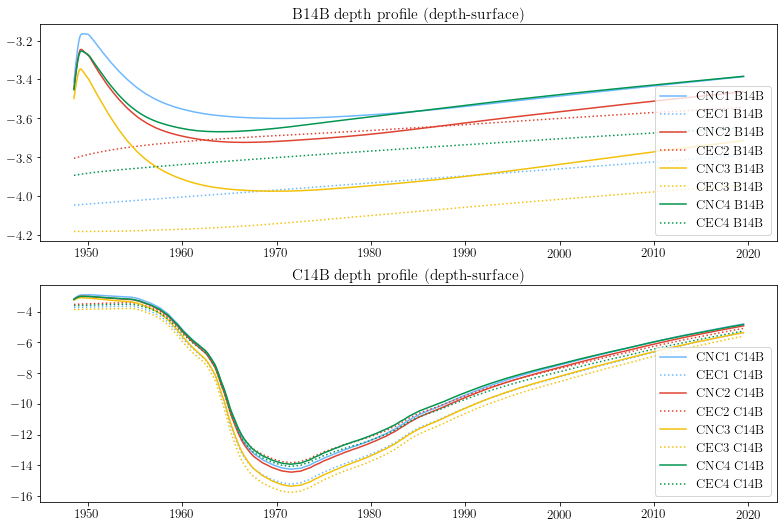

In [38]:
tdir = '/gpfs/home/mep22dku/scratch/C14/GCBdata/'

cols = ['#6db8ff','#de4231','#f3c108','#02954f']
eruns = ['CEC1','CEC2','CEC3','CEC4']
nruns = ['CNC1','CNC2','CNC3','CNC4']


# tm = 'CNC1'; d = 20; var = 'B14B'; msk = 'smol'
# tfi = f'{tdir}{tm}_1948_2019_d{d}_{var}_mask_{msk}.nc'
# w = xr.open_dataset(tfi)
# var = 'C14B'
# w2 = xr.open_dataset(f'{tdir}{tm}_1948_2019_d{d}_{var}_mask_{msk}.nc')


times = pd.date_range(f"{1948}/01/01",f"{2020}/01/01",freq='MS',closed='left')

plt.figure()

msk = 'so'
d = 20

fact = 1.1
fig, axs = plt.subplots(2,1, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i in range(0,4):
    var = 'B14B'
    tm = nruns[i]
    #print(f'{tm}_1948_2019_d{d}_{var}_mask_{msk}.nc')
    tfi0 = xr.open_dataset(f'{tdir}{tm}_1948_2019_d0_{var}_mask_{msk}.nc')
    tfi = xr.open_dataset(f'{tdir}{tm}_1948_2019_d{d}_{var}_mask_{msk}.nc')
    wd =  tfi - tfi0 
    wd['time_counter'] = times
    wd_r = wd.rolling(time_counter=12, center=True).mean()
    axs[0].plot(wd_r.time_counter,wd_r.B14B, color = cols[i],label = f'{tm} {var}')
    
    var = 'B14B'
    tm = eruns[i]
    #print(f'{tm}_1948_2019_d{d}_{var}_mask_{msk}.nc')
    tfi0 = xr.open_dataset(f'{tdir}{tm}_1948_2019_d0_{var}_mask_{msk}.nc')
    tfi = xr.open_dataset(f'{tdir}{tm}_1948_2019_d{d}_{var}_mask_{msk}.nc')
    wd =  tfi - tfi0 
    wd['time_counter'] = times
    wd_r = wd.rolling(time_counter=12, center=True).mean()
    axs[0].plot(wd_r.time_counter,wd_r.B14B, color = cols[i], label = f'{tm} {var}', linestyle = ':')
    
    var = 'C14B'
    tm = nruns[i]
    #print(f'{tm}_1948_2019_d{d}_{var}_mask_{msk}.nc')
    tfi0 = xr.open_dataset(f'{tdir}{tm}_1948_2019_d0_{var}_mask_{msk}.nc')
    tfi = xr.open_dataset(f'{tdir}{tm}_1948_2019_d{d}_{var}_mask_{msk}.nc')
    wd =  tfi - tfi0 
    wd['time_counter'] = times
    wd_r = wd.rolling(time_counter=12, center=True).mean()
    axs[1].plot(wd_r.time_counter,wd_r.C14B, color = cols[i],label = f'{tm} {var}')

    var = 'C14B'
    tm = eruns[i]
    #print(f'{tm}_1948_2019_d{d}_{var}_mask_{msk}.nc')
    tfi0 = xr.open_dataset(f'{tdir}{tm}_1948_2019_d0_{var}_mask_{msk}.nc')
    tfi = xr.open_dataset(f'{tdir}{tm}_1948_2019_d{d}_{var}_mask_{msk}.nc')
    wd =  tfi - tfi0 
    wd['time_counter'] = times
    wd_r = wd.rolling(time_counter=12, center=True).mean()
    axs[1].plot(wd_r.time_counter,wd_r.C14B, color = cols[i], label = f'{tm} {var}', linestyle = ':')
#plt.plot(times, w2.C14B)

for i in range(0,2):
    axs[i].legend(loc = 'lower right')
axs[0].set_title('B14B depth profile (depth-surface)')
axs[1].set_title('C14B depth profile (depth-surface)')


<Figure size 432x288 with 0 Axes>

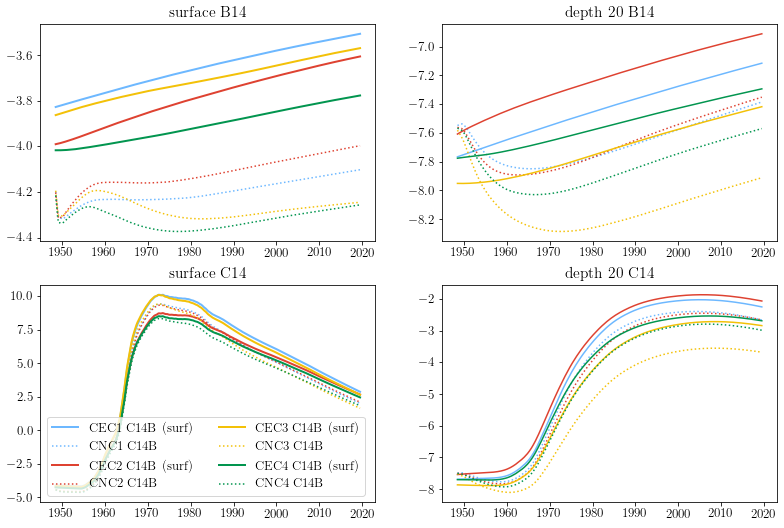

In [39]:
tdir = '/gpfs/home/mep22dku/scratch/C14/GCBdata/'

cols = ['#6db8ff','#de4231','#f3c108','#02954f']
eruns = ['CEC1','CEC2','CEC3','CEC4']
nruns = ['CNC1','CNC2','CNC3','CNC4']


# tm = 'CNC1'; d = 20; var = 'B14B'; msk = 'smol'
# tfi = f'{tdir}{tm}_1948_2019_d{d}_{var}_mask_{msk}.nc'
# w = xr.open_dataset(tfi)
# var = 'C14B'
# w2 = xr.open_dataset(f'{tdir}{tm}_1948_2019_d{d}_{var}_mask_{msk}.nc')


times = pd.date_range(f"{1948}/01/01",f"{2020}/01/01",freq='MS',closed='left')

plt.figure()

msk = 'band'
d = 20

fact = 1.1
fig, axs = plt.subplots(2,2, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i in range(0,4):
    var = 'B14B'
    tm = eruns[i]
    #print(f'{tm}_1948_2019_d{d}_{var}_mask_{msk}.nc')
    tfi0 = xr.open_dataset(f'{tdir}{tm}_1948_2019_d0_{var}_mask_{msk}.nc')
    tfi = xr.open_dataset(f'{tdir}{tm}_1948_2019_d{d}_{var}_mask_{msk}.nc')
    tfi['time_counter'] = times
    tfi0['time_counter'] = times

    tfi_r = tfi.rolling(time_counter=12, center=True).mean()
    axs[1].plot(tfi_r.time_counter,tfi_r.B14B, color = cols[i],label = f'{tm} {var}')
    tfi0_r = tfi0.rolling(time_counter=12, center=True).mean()
    axs[0].plot(tfi0_r.time_counter,tfi0_r.B14B, color = cols[i],label = f'{tm} {var} (surf)', linewidth = 2)    
    
    tm = nruns[i]
    #print(f'{tm}_1948_2019_d{d}_{var}_mask_{msk}.nc')
    tfi0 = xr.open_dataset(f'{tdir}{tm}_1948_2019_d0_{var}_mask_{msk}.nc')
    tfi = xr.open_dataset(f'{tdir}{tm}_1948_2019_d{d}_{var}_mask_{msk}.nc')
    tfi['time_counter'] = times
    tfi0['time_counter'] = times

    tfi_r = tfi.rolling(time_counter=12, center=True).mean()
    axs[1].plot(tfi_r.time_counter,tfi_r.B14B, color = cols[i],label = f'{tm} {var}', linestyle = ':')
    tfi0_r = tfi0.rolling(time_counter=12, center=True).mean()
    axs[0].plot(tfi0_r.time_counter,tfi0_r.B14B, color = cols[i],label = f'{tm} {var} (surf)', linestyle = ':')  

    var = 'C14B'
    tm = eruns[i]
    #print(f'{tm}_1948_2019_d{d}_{var}_mask_{msk}.nc')
    tfi0 = xr.open_dataset(f'{tdir}{tm}_1948_2019_d0_{var}_mask_{msk}.nc')
    tfi = xr.open_dataset(f'{tdir}{tm}_1948_2019_d{d}_{var}_mask_{msk}.nc')
    tfi['time_counter'] = times
    tfi0['time_counter'] = times

    tfi_r = tfi.rolling(time_counter=12, center=True).mean()
    axs[3].plot(tfi_r.time_counter,tfi_r.C14B, color = cols[i],label = f'{tm} {var}')
    tfi0_r = tfi0.rolling(time_counter=12, center=True).mean()
    axs[2].plot(tfi0_r.time_counter,tfi0_r.C14B, color = cols[i],label = f'{tm} {var} (surf)', linewidth = 2)    
    
    tm = nruns[i]
    #print(f'{tm}_1948_2019_d{d}_{var}_mask_{msk}.nc')
    tfi0 = xr.open_dataset(f'{tdir}{tm}_1948_2019_d0_{var}_mask_{msk}.nc')
    tfi = xr.open_dataset(f'{tdir}{tm}_1948_2019_d{d}_{var}_mask_{msk}.nc')
    tfi['time_counter'] = times
    tfi0['time_counter'] = times

    tfi_r = tfi.rolling(time_counter=12, center=True).mean()
    axs[3].plot(tfi_r.time_counter,tfi_r.C14B, color = cols[i],label = f'{tm} {var}', linestyle = ':')
    tfi0_r = tfi0.rolling(time_counter=12, center=True).mean()
    axs[2].plot(tfi0_r.time_counter,tfi0_r.C14B, color = cols[i],label = f'{tm} {var}', linestyle = ':')  
    
    
tits = ['surface B14', f'depth {d} B14', 'surface C14', f'depth {d} C14']
for i in range(0,4):
    axs[i].set_title(tits[i])
axs[2].legend(loc = 'best', ncol = 2)

In [44]:
extract = True

yrst = 1948; yrend = 2019


eruns = ['CEC1','CEC2','CEC3','CEC4','CNC1','CNC2','CNC3','CNC4']
tdir = '/gpfs/home/mep22dku/scratch/C14/GCBdata/'

if extract:
    def make_yearlist(yrst, yrend, dtype, tr, baseDir = '/gpfs/data/greenocean/software/runs/'):
        yrs = np.arange(yrst,yrend+1,1)
        ylist = []
        for i in range(0,len(yrs)):
            ty = f'{baseDir}/{tr}/ORCA2_1m_{yrs[i]}*{dtype}*.nc'
            t2 = glob.glob(ty)
            #print(t2)
            ylist.append(t2[0])
        return ylist


    for run in eruns:
        print(run)
        GEA4_diad = xr.open_mfdataset(make_yearlist(yrst,yrend,'diad_T',f'TOM12_TJ_{run}'))
        GEA4_diad.qtrB14b.to_netcdf(f'./GCBdata/{run}_{yrst}_{yrend}_qtrB14b.nc')
        GEA4_diad.qtrC14b.to_netcdf(f'./GCBdata/{run}_{yrst}_{yrend}_qtrC14b.nc')

CEC1
CEC2
CEC3
CEC4
CNC1
CNC2
CNC3
CNC4


In [45]:
masks = ['mask_so', 'mask_band', 'mask_so50', 'mask_smol', 'mask_wide']

def get_norm(tr,yrst = 1948,yrend = 2019, masknam = 'mask_band'):
    
    print(tr)
    qtrB14b = xr.open_dataset(f'./GCBdata/{tr}_{yrst}_{yrend}_qtrB14b.nc')
    qtrC14b = xr.open_dataset(f'./GCBdata/{tr}_{yrst}_{yrend}_qtrC14b.nc')
    tmeshf = './obs/mmask.nc'
    tmesh = xr.open_dataset(tmeshf)
    
    d = 0
    tarea = tmesh.tmask[0,d,:,:] * tmesh.e1t[0,:,:] * tmesh.e2t[0,:,:] * tmesh[masknam][:,:]
    tB14 = qtrB14b.qtrB14b.weighted(tarea).mean(dim = ['y','x'])
    tB14.to_netcdf(f'./GCBdata/{tr}_{yrst}_{yrend}_qtrB14b_{masknam}.nc')
    tB14 = qtrC14b.qtrC14b.weighted(tarea).mean(dim = ['y','x'])
    tB14.to_netcdf(f'./GCBdata/{tr}_{yrst}_{yrend}_qtrC14b_{masknam}.nc')
    
for run in eruns:
    get_norm(run)

CEC1
CEC2
CEC3
CEC4
CNC1
CNC2
CNC3
CNC4


<Figure size 432x288 with 0 Axes>

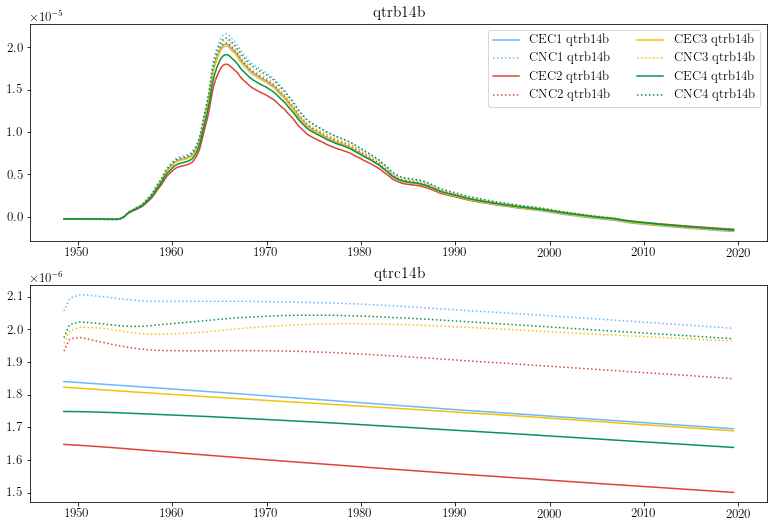

In [49]:
tdir = '/gpfs/home/mep22dku/scratch/C14/GCBdata/'

cols = ['#6db8ff','#de4231','#f3c108','#02954f']
eruns = ['CEC1','CEC2','CEC3','CEC4']
nruns = ['CNC1','CNC2','CNC3','CNC4']



times = pd.date_range(f"{1948}/01/01",f"{2020}/01/01",freq='MS',closed='left')

plt.figure()

msk = 'band'
d = 20

fact = 1.1
fig, axs = plt.subplots(2,1, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i in range(0,4):

    var = 'qtrb14b'
    tr = eruns[i]
    #print(f'{tm}_1948_2019_d{d}_{var}_mask_{msk}.nc')
    tfi0 = xr.open_dataset(f'./GCBdata/{tr}_{yrst}_{yrend}_qtrB14b_mask_band.nc')
    tfi = xr.open_dataset(f'./GCBdata/{tr}_{yrst}_{yrend}_qtrC14b_mask_band.nc')
    tfi['time_counter'] = times
    tfi0['time_counter'] = times

    tfi_r = tfi.rolling(time_counter=12, center=True).mean()
    axs[1].plot(tfi_r.time_counter,tfi_r.qtrC14b, color = cols[i],label = f'{tr} {var}')
    tfi0_r = tfi0.rolling(time_counter=12, center=True).mean()
    axs[0].plot(tfi0_r.time_counter,tfi0_r.qtrB14b, color = cols[i],label = f'{tr} {var}')    
    
    tr = nruns[i]
    #print(f'{tm}_1948_2019_d{d}_{var}_mask_{msk}.nc')
    tfi0 = xr.open_dataset(f'./GCBdata/{tr}_{yrst}_{yrend}_qtrB14b_mask_band.nc')
    tfi = xr.open_dataset(f'./GCBdata/{tr}_{yrst}_{yrend}_qtrC14b_mask_band.nc')
    tfi['time_counter'] = times
    tfi0['time_counter'] = times

    tfi_r = tfi.rolling(time_counter=12, center=True).mean()
    axs[1].plot(tfi_r.time_counter,tfi_r.qtrC14b, color = cols[i],label = f'{tr} {var}', linestyle = ':')
    tfi0_r = tfi0.rolling(time_counter=12, center=True).mean()
    axs[0].plot(tfi0_r.time_counter,tfi0_r.qtrB14b, color = cols[i],label = f'{tr} {var}', linestyle = ':')
    
tits = ['qtrb14b', f'qtrc14b']#, 'surface C14', f'depth {d} C14']
for i in range(0,2):
    axs[i].set_title(tits[i])
axs[0].legend(loc = 'best', ncol = 2)

In [9]:
def get_dat(Cdir,d,masknam):
    tdir = '/gpfs/home/mep22dku/scratch/C14/GCBdata/'
    w0 = xr.open_dataset(f'{tdir}/{Cdir}_1948_2019_d{0}_C14B_mask_{masknam}.nc')
    w1 = xr.open_dataset(f'{tdir}/{Cdir}_1948_2019_d{d}_C14B_mask_{masknam}.nc')
    wd = w0 - w1
    wd['time_counter'] = times
    wd_r = wd.rolling(time_counter=12, center=True).mean()

    wd_r = wd_r - np.nanmin(wd_r.C14B.values)
#     if (np.nanmin(wd_r.C14B) < 0):
#         wdn = wd_r - 2*np.nanmin(wd_r.C14B)
#         wdn = wdn.C14B.values
#         norm = qtrdiff.values/wdn
    #else:
    wdn = wd_r.C14B
    wdn = wdn
    

    
    return wd_r.time_counter, wdn


ttime, CNC1_band = get_dat('CNC1',20,'band')
ttime, CEC1_band = get_dat('CEC1',20,'band')

In [10]:
masks = ['so','band','so50','smol','wide']
cols = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', \
        '#f58231', '#911eb4', '#46f0f0', '#f032e6', \
        '#bcf60c', '#fabebe', '#008080', '#e6beff', \
        '#9a6324', '#fffac8', '#800000', '#aaffc3', \
        '#808000', '#ffd8b1', '#000075', '#808080', \
        '#ffffff', '#000000']

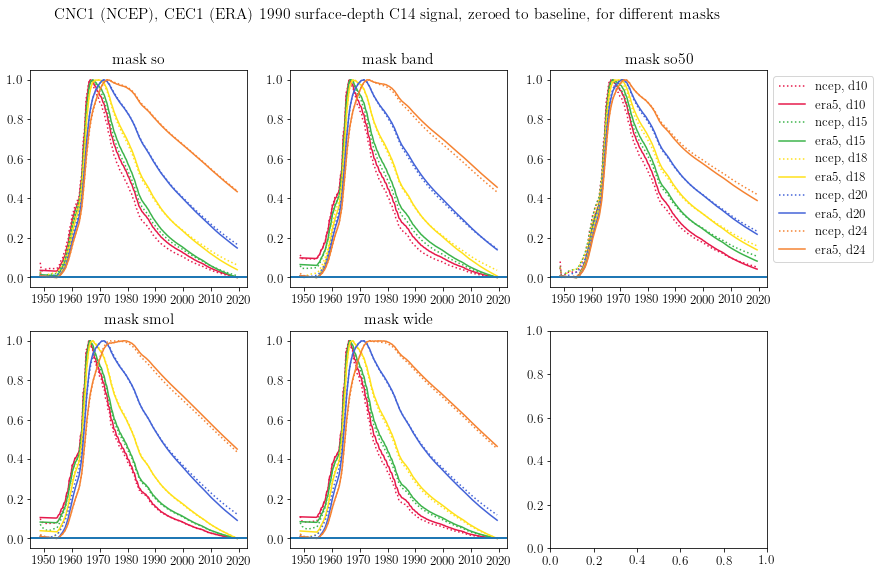

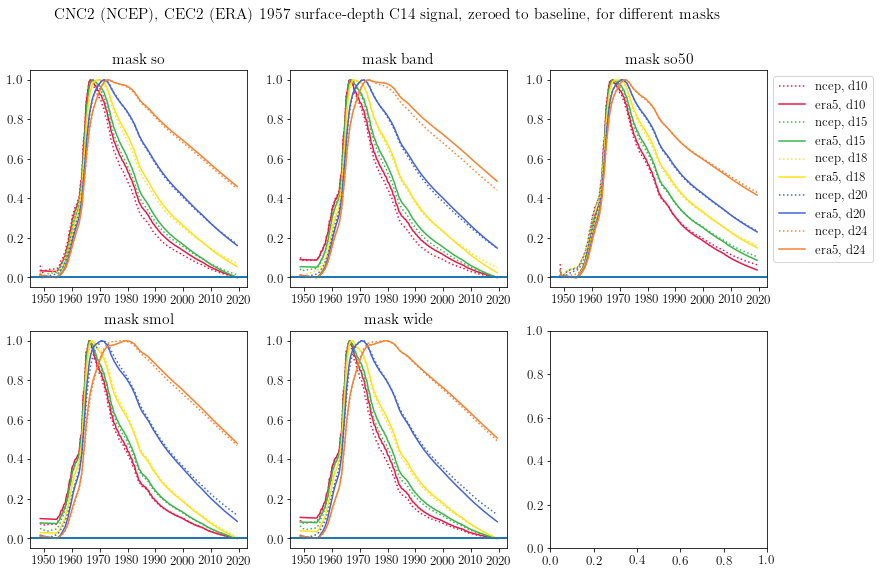

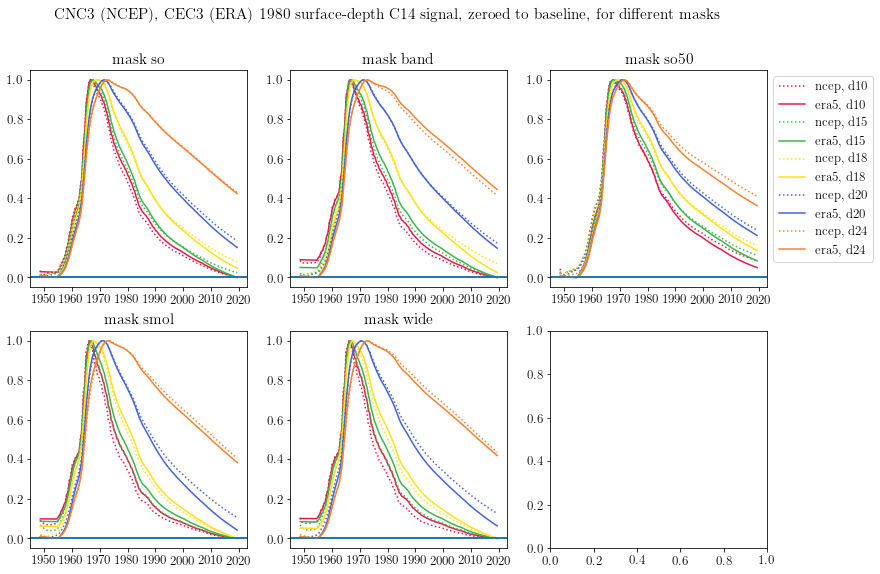

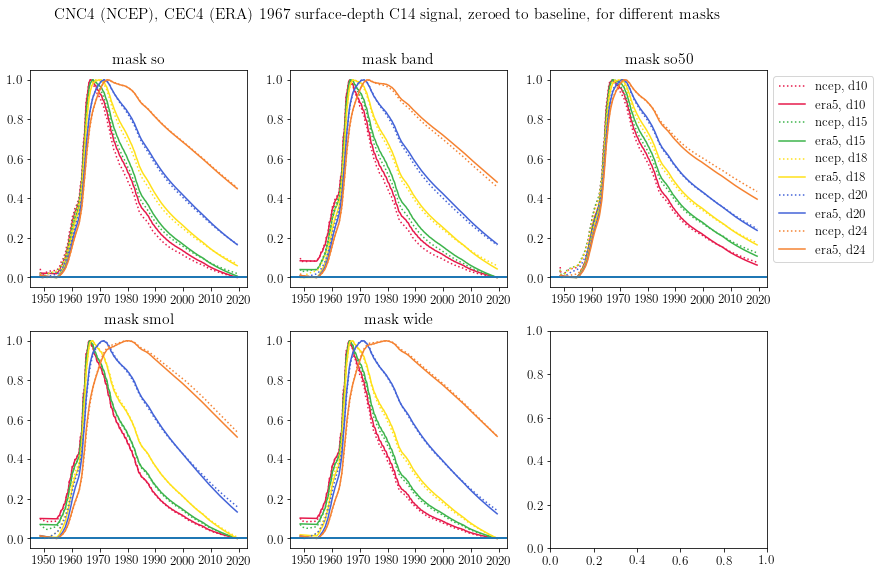

In [11]:


def make_c14_depth(Ndir, Edir, yr):
    
    fact = 1.1
    fig, axs = plt.subplots(2,3, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
    axs = axs.ravel()

    inds = [10, 15, 18, 20, 24]
    masks = ['so','band','so50','smol','wide']



    for m in range(0,5):

        for i in range(0,5):
            ind = inds[i]
            tmask = masks[m]
            ttime, CNC1_band = get_dat(Ndir,ind,tmask)
            ttime, CEC1_band = get_dat(Edir,ind,tmask)
            axs[m].plot(ttime,CNC1_band/np.nanmax(CNC1_band),linestyle = ':', color = cols[i], label = f'ncep, d{ind}')
            axs[m].plot(ttime,CEC1_band/np.nanmax(CEC1_band),linestyle = '-', color = cols[i], label = f'era5, d{ind}')
            axs[m].axhline(y=0)
            axs[m].set_title(f'mask {tmask}')
            #axs[m].set_ylim([-0.5,15])
    axs[2].legend(bbox_to_anchor = [1, 1])

    plt.suptitle(f'{Ndir} (NCEP), {Edir} (ERA) {yr} surface-depth C14 signal, zeroed to baseline, for different masks')
    #plt.savefig(f'./plt/{Ndir}_{Edir}_{yr}_c14depth.png')
                
Ndir = 'CNC1'; Edir = 'CEC1'
make_c14_depth(Ndir, Edir, 1990)

Ndir = 'CNC2'; Edir = 'CEC2'
make_c14_depth(Ndir, Edir, 1957)

Ndir = 'CNC3'; Edir = 'CEC3'
make_c14_depth(Ndir, Edir, 1980)

Ndir = 'CNC4'; Edir = 'CEC4'
make_c14_depth(Ndir, Edir, 1967)

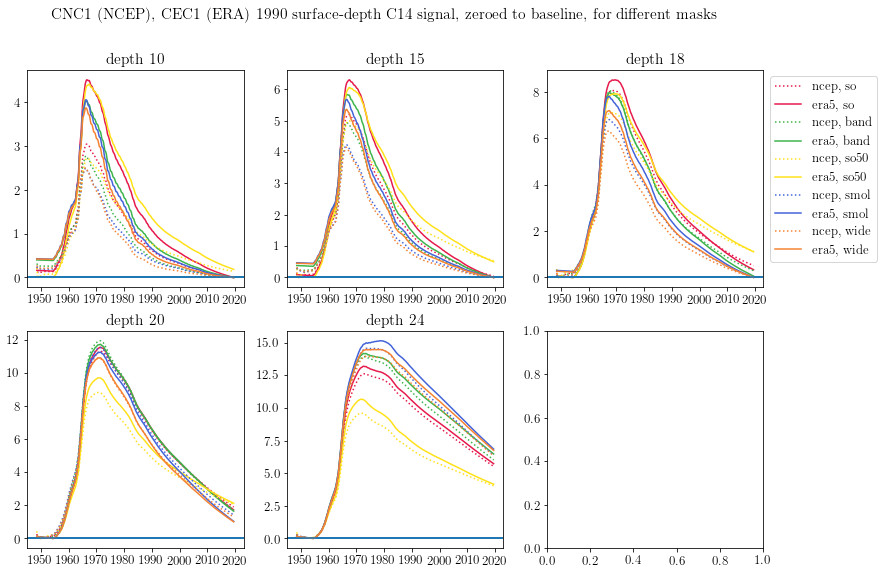

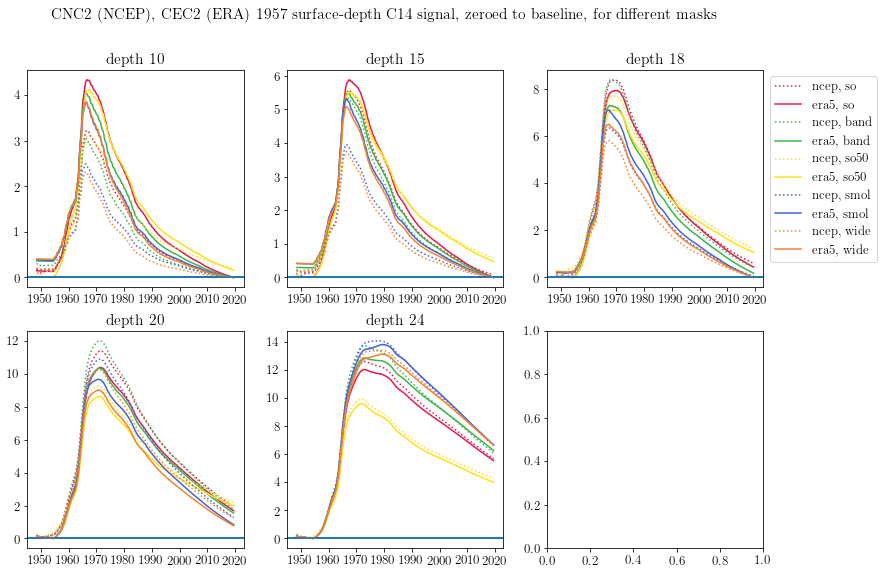

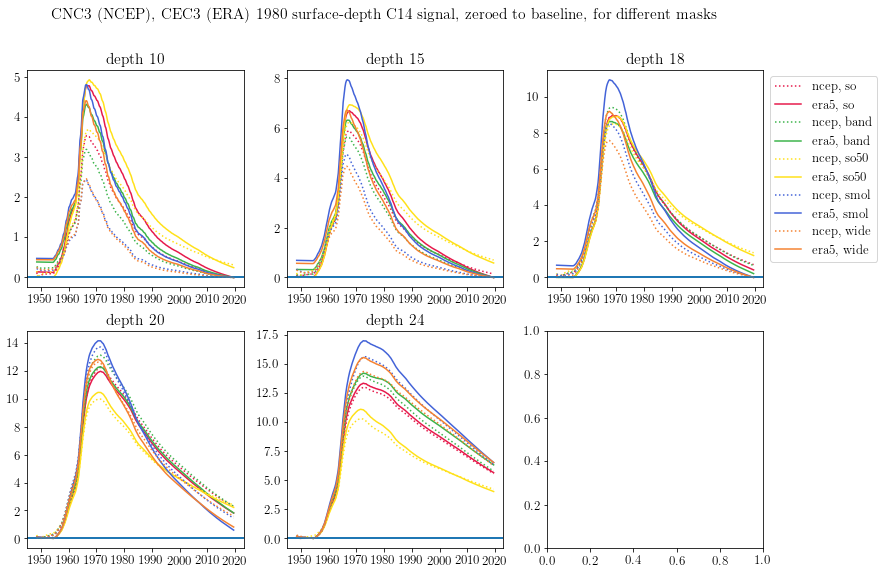

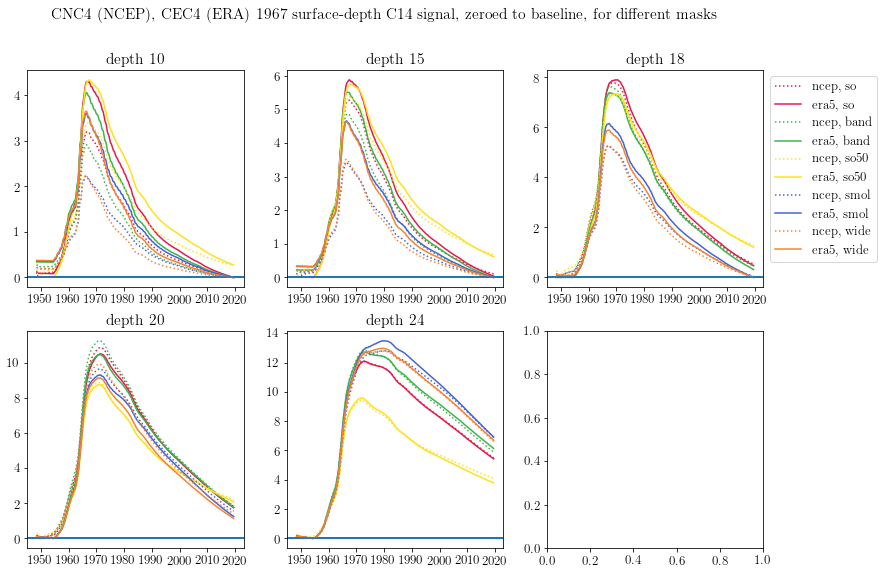

In [12]:


def make_c14_depth(Ndir, Edir, yr):
    
    fact = 1.1
    fig, axs = plt.subplots(2,3, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
    axs = axs.ravel()

    inds = [10, 15, 18, 20, 24]
    masks = ['so','band','so50','smol','wide']



    for m in range(0,5):

        for i in range(0,5):
            ind = inds[i]
            tmask = masks[m]
            ttime, CNC1_band = get_dat(Ndir,ind,tmask)
            ttime, CEC1_band = get_dat(Edir,ind,tmask)
            axs[i].plot(ttime,CNC1_band,linestyle = ':', color = cols[m], label = f'ncep, {tmask}')
            axs[i].plot(ttime,CEC1_band,linestyle = '-', color = cols[m], label = f'era5, {tmask}')
            axs[i].axhline(y=0)
            axs[i].set_title(f'depth {ind}')
            # axs[i].set_ylim([-0.5,15])
    axs[2].legend(bbox_to_anchor = [1, 1])

    plt.suptitle(f'{Ndir} (NCEP), {Edir} (ERA) {yr} surface-depth C14 signal, zeroed to baseline, for different masks')
    #plt.savefig(f'./plt/{Ndir}_{Edir}_{yr}_c14depth.png')
                
Ndir = 'CNC1'; Edir = 'CEC1'
make_c14_depth(Ndir, Edir, 1990)

Ndir = 'CNC2'; Edir = 'CEC2'
make_c14_depth(Ndir, Edir, 1957)

Ndir = 'CNC3'; Edir = 'CEC3'
make_c14_depth(Ndir, Edir, 1980)

Ndir = 'CNC4'; Edir = 'CEC4'
make_c14_depth(Ndir, Edir, 1967)

In [13]:
CNC1_band[0:20]

<xarray.DataArray 'C14B' (time_counter: 20)>
array([       nan,        nan,        nan,        nan,        nan,
              nan, 0.14799835, 0.13109098, 0.11446928, 0.09753757,
       0.08063731, 0.06415071, 0.0485657 , 0.03577946, 0.02687201,
       0.02115321, 0.01754702, 0.01487626, 0.01239084, 0.00979638])
Coordinates:
    time_centered  (time_counter) object 1948-01-16 12:00:00 ... 1949-08-16 1...
  * time_counter   (time_counter) datetime64[ns] 1948-01-01 ... 1949-08-01

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


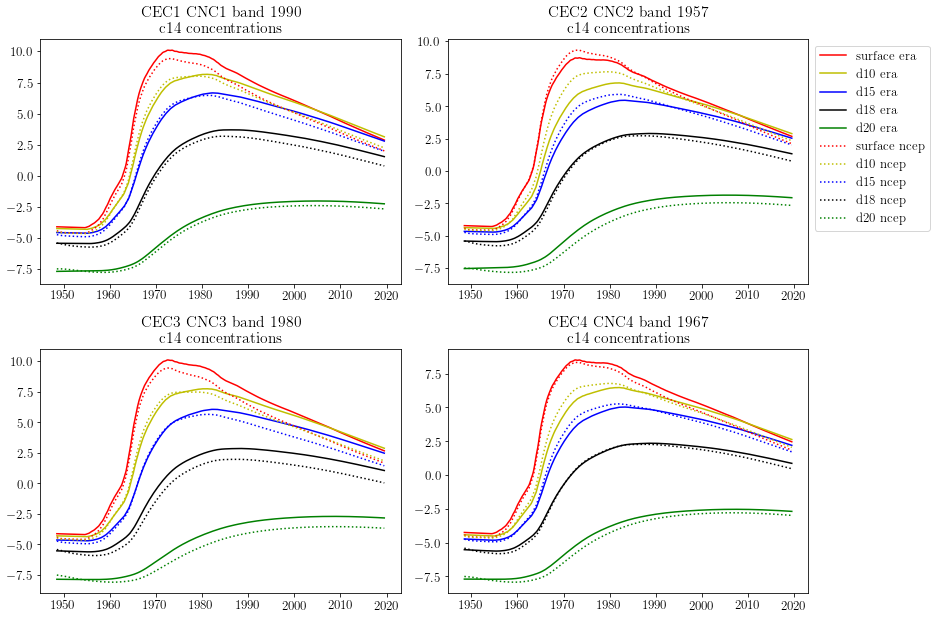

In [14]:
def get_sd(Cdir,d,masknam):
    tdir = '/gpfs/home/mep22dku/scratch/C14/GCBdata/'
    w0 = xr.open_dataset(f'{tdir}/{Cdir}_1948_2019_d{0}_C14B_mask_{masknam}.nc')
    wd = xr.open_dataset(f'{tdir}/{Cdir}_1948_2019_d{d}_C14B_mask_{masknam}.nc')
    #wd = w0 - w1
    w0['time_counter'] = times
    w0_r = w0.rolling(time_counter=12, center=True).mean()
    wd_r = wd.rolling(time_counter=12, center=True).mean()
    
    return w0_r.time_counter, w0_r, wd_r

# trun = 'CEC2'; trun2 = 'CNC2'
# tmask = 'band'
# ttime, CNC1_band, CNC1d10_band = get_sd(trun,10,tmask)
# ttime, CNC1_band, CNC1d15_band = get_sd(trun,15,tmask)
# ttime, CNC1_band, CNC1d18_band = get_sd(trun,18,tmask)
# ttime, CNC1_band, CNC1d20_band = get_sd(trun,20,tmask)
# #ttime, CEC1_band = get_dat('CEC1',20,tmask)

# plt.plot(ttime, CNC1_band.C14B, label = 'surface era ', color = 'r')
# plt.plot(ttime, CNC1d10_band.C14B, label = 'd10 era', color = 'y')
# plt.plot(ttime, CNC1d15_band.C14B, label = 'd15 era', color = 'b')
# plt.plot(ttime, CNC1d18_band.C14B, label = 'd18 era', color = 'k')
# plt.plot(ttime, CNC1d20_band.C14B, label = 'd20 era', color = 'g')
# plt.legend(loc = 'best')


# ttime, CNC1_band, CNC1d10_band = get_sd(trun2,10,tmask)
# ttime, CNC1_band, CNC1d15_band = get_sd(trun2,15,tmask)
# ttime, CNC1_band, CNC1d18_band = get_sd(trun2,18,tmask)
# ttime, CNC1_band, CNC1d20_band = get_sd(trun2,20,tmask)
# #ttime, CEC1_band = get_dat('CEC1',20,'band')

# plt.plot(ttime, CNC1_band.C14B, label = 'surface ncep', color = 'r', linestyle = ':')
# plt.plot(ttime, CNC1d10_band.C14B, label = 'd10 ncep', color = 'y', linestyle = ':')
# plt.plot(ttime, CNC1d15_band.C14B, label = 'd15 ncep', color = 'b', linestyle = ':')
# plt.plot(ttime, CNC1d18_band.C14B, label = 'd18 ncep', color = 'k', linestyle = ':')
# plt.plot(ttime, CNC1d20_band.C14B, label = 'd20 ncep', color = 'g', linestyle = ':')
# plt.legend(bbox_to_anchor = [1,1])

# plt.title(f'{trun} {trun2} {tmask} c14 concentrations')


fact = 1.1
fig, axs = plt.subplots(2,2, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

es = ['CEC1','CEC2','CEC3','CEC4']
ns = ['CNC1','CNC2','CNC3','CNC4']
yrs = [1990,1957,1980,1967]
for i in range(0,4):

    trun = es[i]
    trun2 = ns[i]

    tmask = 'band'
    ttime, CNC1_band, CNC1d10_band = get_sd(trun,10,tmask)
    ttime, CNC1_band, CNC1d15_band = get_sd(trun,15,tmask)
    ttime, CNC1_band, CNC1d18_band = get_sd(trun,18,tmask)
    ttime, CNC1_band, CNC1d20_band = get_sd(trun,20,tmask)
    #ttime, CEC1_band = get_dat('CEC1',20,tmask)

    axs[i].plot(ttime, CNC1_band.C14B, label = 'surface era ', color = 'r')
    axs[i].plot(ttime, CNC1d10_band.C14B, label = 'd10 era', color = 'y')
    axs[i].plot(ttime, CNC1d15_band.C14B, label = 'd15 era', color = 'b')
    axs[i].plot(ttime, CNC1d18_band.C14B, label = 'd18 era', color = 'k')
    axs[i].plot(ttime, CNC1d20_band.C14B, label = 'd20 era', color = 'g')
    #axs[i].legend(loc = 'best')


    ttime, CNC1_band, CNC1d10_band = get_sd(trun2,10,tmask)
    ttime, CNC1_band, CNC1d15_band = get_sd(trun2,15,tmask)
    ttime, CNC1_band, CNC1d18_band = get_sd(trun2,18,tmask)
    ttime, CNC1_band, CNC1d20_band = get_sd(trun2,20,tmask)
    #ttime, CEC1_band = get_dat('CEC1',20,'band')

    axs[i].plot(ttime, CNC1_band.C14B, label = 'surface ncep', color = 'r', linestyle = ':')
    axs[i].plot(ttime, CNC1d10_band.C14B, label = 'd10 ncep', color = 'y', linestyle = ':')
    axs[i].plot(ttime, CNC1d15_band.C14B, label = 'd15 ncep', color = 'b', linestyle = ':')
    axs[i].plot(ttime, CNC1d18_band.C14B, label = 'd18 ncep', color = 'k', linestyle = ':')
    axs[i].plot(ttime, CNC1d20_band.C14B, label = 'd20 ncep', color = 'g', linestyle = ':')
    axs[1].legend(bbox_to_anchor = [1,1])

    axs[i].set_title(f'{trun} {trun2} {tmask} {yrs[i]} \n c14 concentrations')


plt.tight_layout()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


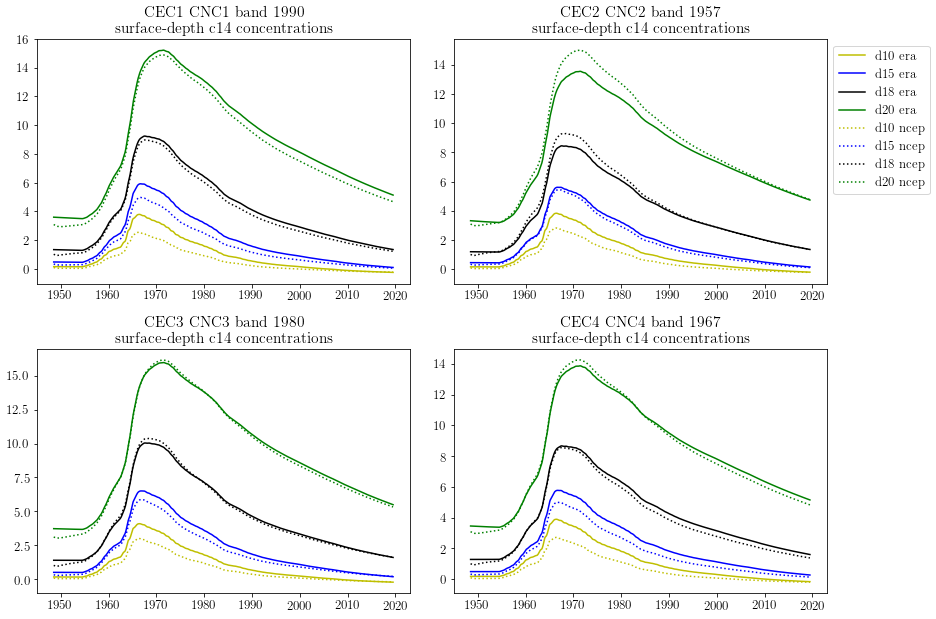

In [15]:
def get_sd(Cdir,d,masknam):
    tdir = '/gpfs/home/mep22dku/scratch/C14/GCBdata/'
    w0 = xr.open_dataset(f'{tdir}/{Cdir}_1948_2019_d{0}_C14B_mask_{masknam}.nc')
    wd = xr.open_dataset(f'{tdir}/{Cdir}_1948_2019_d{d}_C14B_mask_{masknam}.nc')
    #wd = w0 - w1
    w0['time_counter'] = times
    wd['time_counter'] = times
    w0_r = w0.rolling(time_counter=12, center=True).mean()
    wd_r = wd.rolling(time_counter=12, center=True).mean()
    
    return w0_r.time_counter, w0_r, wd_r

# trun = 'CEC2'; trun2 = 'CNC2'
# tmask = 'band'
# ttime, CNC1_band, CNC1d10_band = get_sd(trun,10,tmask)
# ttime, CNC1_band, CNC1d15_band = get_sd(trun,15,tmask)
# ttime, CNC1_band, CNC1d18_band = get_sd(trun,18,tmask)
# ttime, CNC1_band, CNC1d20_band = get_sd(trun,20,tmask)
# #ttime, CEC1_band = get_dat('CEC1',20,tmask)

# plt.plot(ttime, CNC1_band.C14B, label = 'surface era ', color = 'r')
# plt.plot(ttime, CNC1d10_band.C14B, label = 'd10 era', color = 'y')
# plt.plot(ttime, CNC1d15_band.C14B, label = 'd15 era', color = 'b')
# plt.plot(ttime, CNC1d18_band.C14B, label = 'd18 era', color = 'k')
# plt.plot(ttime, CNC1d20_band.C14B, label = 'd20 era', color = 'g')
# plt.legend(loc = 'best')


# ttime, CNC1_band, CNC1d10_band = get_sd(trun2,10,tmask)
# ttime, CNC1_band, CNC1d15_band = get_sd(trun2,15,tmask)
# ttime, CNC1_band, CNC1d18_band = get_sd(trun2,18,tmask)
# ttime, CNC1_band, CNC1d20_band = get_sd(trun2,20,tmask)
# #ttime, CEC1_band = get_dat('CEC1',20,'band')

# plt.plot(ttime, CNC1_band.C14B, label = 'surface ncep', color = 'r', linestyle = ':')
# plt.plot(ttime, CNC1d10_band.C14B, label = 'd10 ncep', color = 'y', linestyle = ':')
# plt.plot(ttime, CNC1d15_band.C14B, label = 'd15 ncep', color = 'b', linestyle = ':')
# plt.plot(ttime, CNC1d18_band.C14B, label = 'd18 ncep', color = 'k', linestyle = ':')
# plt.plot(ttime, CNC1d20_band.C14B, label = 'd20 ncep', color = 'g', linestyle = ':')
# plt.legend(bbox_to_anchor = [1,1])

# plt.title(f'{trun} {trun2} {tmask} c14 concentrations')


fact = 1.1
fig, axs = plt.subplots(2,2, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

es = ['CEC1','CEC2','CEC3','CEC4']
ns = ['CNC1','CNC2','CNC3','CNC4']
yrs = [1990,1957,1980,1967]
for i in range(0,4):

    trun = es[i]
    trun2 = ns[i]

    tmask = 'band'
    ttime, CNC1_band, CNC1d10_band = get_sd(trun,10,tmask)
    ttime, CNC1_band, CNC1d15_band = get_sd(trun,15,tmask)
    ttime, CNC1_band, CNC1d18_band = get_sd(trun,18,tmask)
    ttime, CNC1_band, CNC1d20_band = get_sd(trun,20,tmask)
    #ttime, CEC1_band = get_dat('CEC1',20,tmask)

    #axs[i].plot(ttime, CNC1_band.C14B, label = 'surface era ', color = 'r')
    axs[i].plot(ttime, CNC1_band.C14B-CNC1d10_band.C14B, label = 'd10 era', color = 'y')
    axs[i].plot(ttime, CNC1_band.C14B-CNC1d15_band.C14B, label = 'd15 era', color = 'b')
    axs[i].plot(ttime, CNC1_band.C14B-CNC1d18_band.C14B, label = 'd18 era', color = 'k')
    axs[i].plot(ttime, CNC1_band.C14B-CNC1d20_band.C14B, label = 'd20 era', color = 'g')
    #axs[i].legend(loc = 'best')


    ttime, CNC1_band, CNC1d10_band = get_sd(trun2,10,tmask)
    ttime, CNC1_band, CNC1d15_band = get_sd(trun2,15,tmask)
    ttime, CNC1_band, CNC1d18_band = get_sd(trun2,18,tmask)
    ttime, CNC1_band, CNC1d20_band = get_sd(trun2,20,tmask)
    #ttime, CEC1_band = get_dat('CEC1',20,'band')

    #axs[i].plot(ttime, CNC1_band.C14B, label = 'surface ncep', color = 'r', linestyle = ':')
    axs[i].plot(ttime, CNC1_band.C14B-CNC1d10_band.C14B, label = 'd10 ncep', color = 'y', linestyle = ':')
    axs[i].plot(ttime, CNC1_band.C14B-CNC1d15_band.C14B, label = 'd15 ncep', color = 'b', linestyle = ':')
    axs[i].plot(ttime, CNC1_band.C14B-CNC1d18_band.C14B, label = 'd18 ncep', color = 'k', linestyle = ':')
    axs[i].plot(ttime, CNC1_band.C14B-CNC1d20_band.C14B, label = 'd20 ncep', color = 'g', linestyle = ':')
    axs[1].legend(bbox_to_anchor = [1,1])

    axs[i].set_title(f'{trun} {trun2} {tmask} {yrs[i]} \n surface-depth c14 concentrations')


plt.tight_layout()

In [16]:
def get_dp(Cdir,d,masknam = 'band'):
    tdir = '/gpfs/home/mep22dku/scratch/C14/GCBdata/'
    w0 = xr.open_dataset(f'{tdir}/{Cdir}_1948_2019_d{0}_C14B_mask_{masknam}.nc')
    w1 = xr.open_dataset(f'{tdir}/{Cdir}_1948_2019_d{d}_C14B_mask_{masknam}.nc')
    wd = w0 - w1
    wd['time_counter'] = times
    wd_r = wd.rolling(time_counter=12, center=True).mean()

    wd_r = wd_r - np.nanmin(wd_r.C14B.values)
    wd_r = wd_r/np.nanmax(wd_r.C14B.values)
    
    return wd_r

In [17]:
def get_qtr(Cdir,masknam = 'band'):
    sdir = '/gpfs/home/mep22dku/scratch/C14/CAL12_series_data'
    qtr = xr.open_dataset(f'{sdir}/qtr_{Cdir}_1948_2019_mask_{masknam}_ts.nc')
    qtr = qtr.rolling(time_counter=12, center=True).mean()
    
    return qtr

def get_cflx(Cdir,masknam = 'band'):
    sdir = '/gpfs/home/mep22dku/scratch/C14/CAL12_series_data'
    qtr = xr.open_dataset(f'{sdir}/cflx_{Cdir}_1948_2019_mask_{masknam}_ts.nc')
    cflx = qtr.rolling(time_counter=12, center=True).mean()
    
    return cflx

<xarray.Dataset>
Dimensions:        (time_counter: 864)
Coordinates:
    time_centered  (time_counter) object 1948-01-16 12:00:00 ... 2019-12-16 1...
  * time_counter   (time_counter) datetime64[ns] 1948-01-01 ... 2019-12-01
Data variables:
    qtrB14b        (time_counter) float64 nan nan nan nan ... nan nan nan nan
10 0.994182978927963 0.0
11 0.9927321853701945 0.0
12 0.9907432181713263 0.0
13 0.988141188091763 0.0
14 0.9846390447792993 0.0
15 0.9794167177403323 0.0
16 0.9711316411138866 0.0
17 0.9561479410787694 0.0
18 0.9242027942047601 0.0
19 0.8613167617561709 1.7427752285008866e-252
20 0.7609172788270155 4.8901377223758e-162
21 0.6328646343434894 1.1985004397974553e-96
22 0.5150558114786103 5.725597943319392e-59
23 0.44219826227006304 3.814750784064621e-42
24 0.41121986236585956 3.871765099537494e-36
<xarray.Dataset>
Dimensions:        (time_counter: 864)
Coordinates:
    time_centered  (time_counter) object 1948-01-16 12:00:00 ... 2019-12-16 1...
  * time_counter   (time_counte

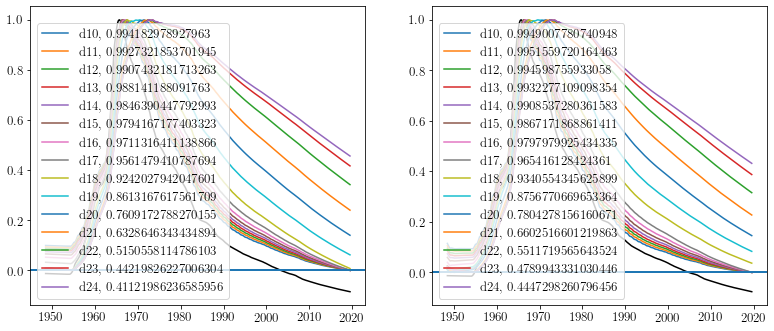

In [18]:
from scipy.stats import pearsonr
tdat = 'CEC1'
fact = 1.1
fig, axs = plt.subplots(1,2, figsize=(12*fact, 5*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

qtr = get_qtr(tdat)
print(qtr)
normqtr = qtr.qtrB14b/np.nanmax(qtr.qtrB14b)
normqtr = normqtr.values

axs[0].plot(qtr.time_counter,normqtr, color = 'k')#,masknam = 'band')

for i in range(10,25):
    wd_r = get_dp(tdat,i)
    normc14b = wd_r.C14B.values

    r_value, p_value = pearsonr(normqtr[~np.isnan(normqtr)], normc14b[~np.isnan(normqtr)])
    axs[0].plot(wd_r.time_counter, normc14b, label = f'd{i}, {r_value}')

    
    
    print(f'{i} {r_value} {p_value}')

    axs[0].axhline(y = 0)
    axs[0].legend(loc = 'best')
    
tdat = 'CNC1'
    
qtr = get_qtr(tdat)
print(qtr)
normqtr = qtr.qtrB14b/np.nanmax(qtr.qtrB14b)
normqtr = normqtr.values

axs[1].plot(qtr.time_counter,normqtr, color = 'k')#,masknam = 'band')

for i in range(10,25):
    wd_r = get_dp(tdat,i)
    normc14b = wd_r.C14B.values

    r_value, p_value = pearsonr(normqtr[~np.isnan(normqtr)], normc14b[~np.isnan(normqtr)])
    axs[1].plot(wd_r.time_counter, normc14b, label = f'd{i}, {r_value}')

    
    
    print(f'{i} {r_value} {p_value}')

    axs[1].axhline(y = 0)
    axs[1].legend(loc = 'best')

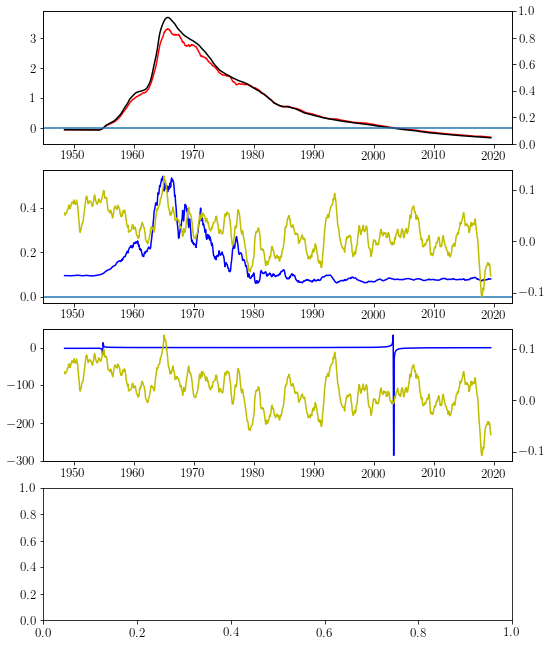

In [19]:
Arun = 'CEA1'
Crun = 'CEC1'

fact = 0.7
fig, axs = plt.subplots(4,1, figsize=(12*fact, 16*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

Arun_qtr = get_qtr(Arun)
Crun_qtr = get_qtr(Crun)
Arun_cflx = get_cflx(Arun)
Crun_cflx = get_cflx(Crun)
buff = 0.1

axs[0].plot(Arun_qtr.time_counter,Arun_qtr.qtrB14b, color = 'r')
axs[0].plot(Arun_qtr.time_counter,Crun_qtr.qtrB14b, color = 'k')
axs[0].axhline(y = 0)
axs0b = axs[0].twinx()

c14diff = -1*(Arun_qtr.qtrB14b-Crun_qtr.qtrB14b) + buff
axs[1].plot(Arun_qtr.time_counter,c14diff, color = 'b')
axs1b = axs[1].twinx()
axs1b.plot(Arun_cflx.time_counter,Arun_cflx.Cflx-Crun_cflx.Cflx, color = 'y')
axs[1].axhline(y= 0)

axs[2].plot(Arun_qtr.time_counter,c14diff/(Crun_qtr.qtrB14b), color = 'b')
axs2b = axs[2].twinx()
axs2b.plot(Arun_cflx.time_counter,Arun_cflx.Cflx-Crun_cflx.Cflx, color = 'y')

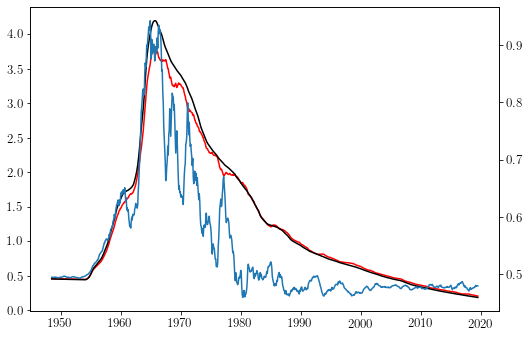

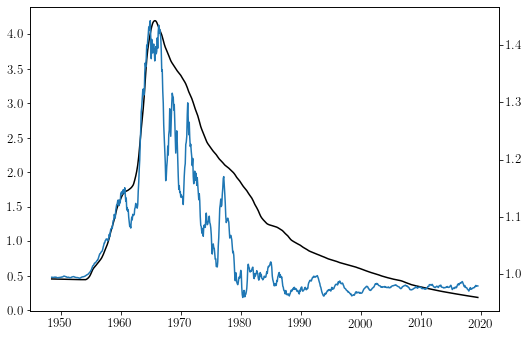

In [20]:
fact = 0.7
fig, axs = plt.subplots(1,1, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
# axs = axs.ravel()
buff = 0.5
axs.plot(Arun_qtr.time_counter,Arun_qtr.qtrB14b+buff, color = 'r')
axs.plot(Arun_qtr.time_counter,Crun_qtr.qtrB14b+buff, color = 'k')

axsb = axs.twinx()
axsb.plot(Arun_qtr.time_counter,(Crun_qtr.qtrB14b-Arun_qtr.qtrB14b)+buff)

fact = 0.7
fig, axs = plt.subplots(1,1, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
# axs = axs.ravel()
buff = 0.5
axs.plot(Arun_qtr.time_counter,Crun_qtr.qtrB14b+buff, color = 'k')

axsb = axs.twinx()
axsb.plot(Arun_qtr.time_counter,((Crun_qtr.qtrB14b-Arun_qtr.qtrB14b)+buff*2))


In [21]:
xs = np.arange(1,11)
sig = np.random.rand(10)*100
print(sig)

def get_normsig(sig):
    mi = np.min(sig)
    ma = np.max(sig)

    signo = (sig-mi)/(ma-mi)

    return signo

[11.20659371 75.16711491 18.1700126  62.5779188  14.56931047 57.13029603
  7.18834982  8.51108538 25.70506545 70.76468794]


0.03436950948796769
0.19500487901186453
-0.039346707596727454
0.0115215514147639
0.039447088373004174
0.25560193189437175
0.005380590129872673
0.5606137722142305
0.544077048509881
0.5322842017493065
0.523095755816843
0.5155626872107074
0.509182957315998
0.5036575171905912
0.4987931751025053
0.4944574145684874
0.4905550224235802
0.48701501675570363
0.4837828750947033
0.48081567789374624
0.4780789444798078
0.475544496980777
0.4731889732311667
0.470992763379701
0.46893923140481364
0.467014133283892
0.46520517410071555
0.46350166538501564
0.46189425613074964
0.4603747188983814
0.45893577773402805
0.4575709682767459
0.45627452295605486
0.45504127597219024
0.4538665840380022
0.4527462597991369
0.45167651554181576
0.4506539153155471
0.44967533398997134
0.4487379220646306


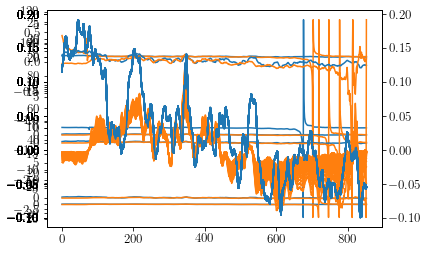

In [22]:
Arun = 'CNA1'
Crun = 'CNC1'

Arun_qtr = get_qtr(Arun)
Crun_qtr = get_qtr(Crun)
Arun_cflx = get_cflx(Arun)
Crun_cflx = get_cflx(Crun)

diff = Crun_qtr.qtrB14b-Arun_qtr.qtrB14b
base = Crun_qtr.qtrB14b
flxdiff = Arun_cflx.Cflx-Crun_cflx.Cflx

for b in range(0,40):
    buff = 0.05*b
    diff_nn = diff[~np.isnan(diff)]
    flx_nn = flxdiff[~np.isnan(diff)]
    base_nn = base[~np.isnan(diff)]

    ndiff_nn = diff_nn/(base_nn+buff)

    plt.plot(ndiff_nn)
    axb = plt.twinx()
    axb.plot(flx_nn)

    r_value, p_value = pearsonr(ndiff_nn, flx_nn)
    print(f'{r_value}')

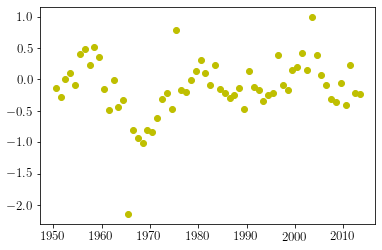

In [23]:
# Specify the path to your Excel file
file_path = './obs/Campbell_Is_vs_Tasmania_gradient_data_Corinne.xlsx'

# Read the Excel file, skipping the first row
df = pd.read_excel(file_path, skiprows=1)

df.rename(columns={'Year (centred on year of growth e.g. 1952 represents October 1951 to March 1952)': 'yr'}, inplace=True)
df.rename(columns={'Delta14C difference': 'Dc14diff'}, inplace=True)
# print(df.columns)

# print(df.yr)

times = pd.date_range(f'{1950}/01/01',f'{2013}/01/01',freq='Y')
# print(times)

start_year = 1950
num_years = 64

# Create the date range
date_range = pd.date_range(start=f'{start_year}-07-01', periods=num_years, freq='AS-JUL')
plt.plot(date_range,df.Dc14diff/np.max(df.Dc14diff), 'yo')

ValueError: x and y must have same first dimension, but have shapes (864,) and (828,)

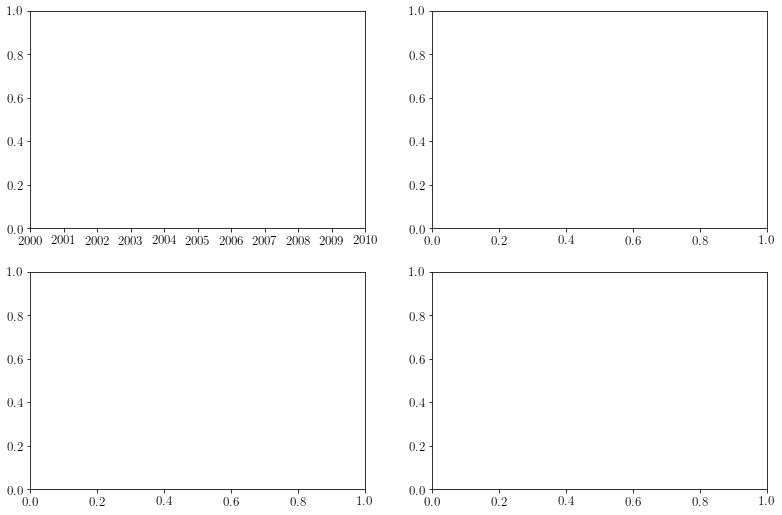

In [24]:
ys = 1950; ye = 2018

fact = 1.1
fig, axs = plt.subplots(2,2, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

Arun = 'CNA1'
Crun = 'CNC2'

Arun_qtr = get_qtr(Arun)
Crun_qtr = get_qtr(Crun)
qtrdiff = -1*(Arun_qtr.qtrB14b-Crun_qtr.qtrB14b)
qtrdiff = qtrdiff.sel(time_counter=slice(f'{ys}-01-01', f'{ye}-12-31'))
Arun_cflx = get_cflx(Arun)
Crun_cflx = get_cflx(Crun)
flxdiff = Arun_cflx.Cflx-Crun_cflx.Cflx
flxdiff = flxdiff.sel(time_counter=slice(f'{ys}-01-01', f'{ye}-12-31'))

axs[0].plot(Arun_qtr.time_counter, qtrdiff, color = 'k')
axs0b = axs[0].twinx()
axs0b.plot(Arun_qtr.time_counter, flxdiff, color = 'r')

axs[2].plot(Arun_qtr.time_counter, qtrdiff, color = 'k')
axs2b = axs[2].twinx()
axs2b.plot(date_range,-1*df.Dc14diff/np.max(df.Dc14diff), 'yo')


Arun = 'CEA1'
Crun = 'CEC2'

Arun_qtr = get_qtr(Arun)
Crun_qtr = get_qtr(Crun)
qtrdiff = -1*(Arun_qtr.qtrB14b-Crun_qtr.qtrB14b)
qtrdiff = qtrdiff.sel(time_counter=slice(f'{ys}-01-01', f'{ye}-12-31'))
Arun_cflx = get_cflx(Arun)
Crun_cflx = get_cflx(Crun)
flxdiff = Arun_cflx.Cflx-Crun_cflx.Cflx
flxdiff = flxdiff.sel(time_counter=slice(f'{ys}-01-01', f'{ye}-12-31'))

axs[1].plot(Arun_qtr.time_counter, qtrdiff, color = 'k')
axs0b = axs[1].twinx()
axs0b.plot(Arun_qtr.time_counter, flxdiff, color = 'r')

axs[3].plot(Arun_qtr.time_counter, qtrdiff, color = 'k')
axs2b = axs[3].twinx()
axs2b.plot(date_range,-1*df.Dc14diff/np.max(df.Dc14diff), 'yo')

